## Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import io 
#202331066_M.Kahlil Ghibran

In [2]:
 original_image_kompresi = cv2.imread("Foto Objek.jpg")
#202331066_M.Kahlil Ghibran

In [3]:
 original_image_kompresi_rgb = cv2.cvtColor(original_image_kompresi, cv2.COLOR_BGR2RGB)
#202331066_M.Kahlil Ghibran

In [4]:
jpeg_quality = 10
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), jpeg_quality]
result, encimg = cv2.imencode('.jpg', original_image_kompresi, encode_param)

lossy_image = cv2.imdecode(encimg, 1)
lossy_image_rgb = cv2.cvtColor(lossy_image, cv2.COLOR_BGR2RGB)

levels = 4
divider = 256 // levels

quantized_image = (original_image_kompresi_rgb // divider) * divider + (divider // 2)

quantized_image = np.uint8(quantized_image)

print("Proses kompresi lossy dan kuantisasi warna selesai.")
#202331066_M.Kahlil Ghibran

Proses kompresi lossy dan kuantisasi warna selesai.


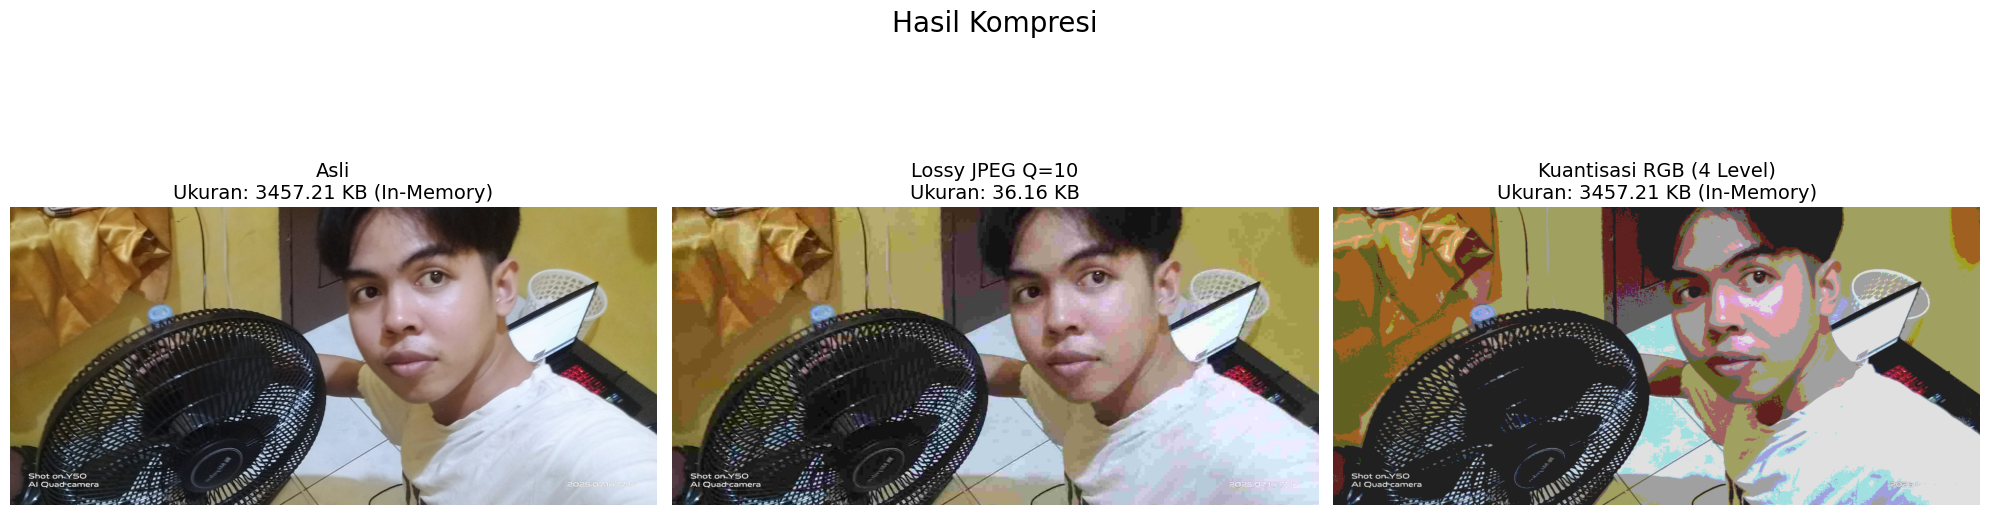

In [5]:
size_original_kb = original_image_kompresi_rgb.nbytes / 1024

size_lossy_kb = len(encimg) / 1024

size_quantized_kb = quantized_image.nbytes / 1024

plt.figure(figsize=(20, 10))
plt.suptitle('Hasil Kompresi', fontsize=20, y=0.8) # y disesuaikan agar tidak tumpang tindih

# Subplot 1: Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(original_image_kompresi_rgb)

plt.title(f'Asli\nUkuran: {size_original_kb:.2f} KB (In-Memory)', fontsize=14)
plt.axis('off')

# Subplot 2: Gambar Hasil Kompresi Lossy
plt.subplot(1, 3, 2)
plt.imshow(lossy_image_rgb)
plt.title(f'Lossy JPEG Q={jpeg_quality}\nUkuran: {size_lossy_kb:.2f} KB', fontsize=14)
plt.axis('off')

# Subplot 3: Gambar Hasil Kuantisasi Warna
plt.subplot(1, 3, 3)
plt.imshow(quantized_image)
plt.title(f'Kuantisasi RGB ({levels} Level)\nUkuran: {size_quantized_kb:.2f} KB (In-Memory)', fontsize=14)
plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
#202331066_M.Kahlil Ghibran